## Digit OCR based on MNIST Dataset
Using Neural Network model.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
#Loading mnist dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

5

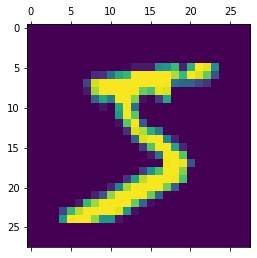

In [4]:
plt.matshow(X_train[0])
y_train[0]

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
#Normalization
X_train = X_train / 255
X_test = X_test / 255

In [10]:
#Developing the Model
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
                             
                  keras.layers.Flatten(input_shape=(28,28)),
                  keras.layers.Dense(300, activation = "relu"),
                  tf.keras.layers.Dropout(0.25),
                  keras.layers.Dense(60, activation = "relu"),
                  tf.keras.layers.Dropout(0.25),
                  keras.layers.Dense(10, activation = "sigmoid")
])
model.compile(
    optimizer = 'SGD', 
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
    )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 60)                18060     
                                                                 
 dropout_3 (Dropout)         (None, 60)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                610       
                                                                 
Total params: 254,170
Trainable params: 254,170
Non-tr

In [15]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.8312 - accuracy: 0.7506 - val_loss: 0.2942 - val_accuracy: 0.9202
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4142 - accuracy: 0.8784 - val_loss: 0.2131 - val_accuracy: 0.9425
Epoch 3/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3343 - accuracy: 0.9015 - val_loss: 0.1790 - val_accuracy: 0.9505
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2876 - accuracy: 0.9177 - val_loss: 0.1539 - val_accuracy: 0.9573
Epoch 5/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2521 - accuracy: 0.9269 - val_loss: 0.1361 - val_accuracy: 0.9630
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2251 - accuracy: 0.9341 - val_loss: 0.1230 - val_accuracy: 0.9670
Epoch 7/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2074 - accuracy: 0.9396 - val_loss: 0.1144 - val_accuracy:

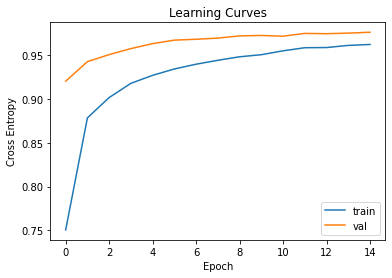

In [16]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9724


[0.09022338688373566, 0.9724000096321106]

In [18]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'Truths')

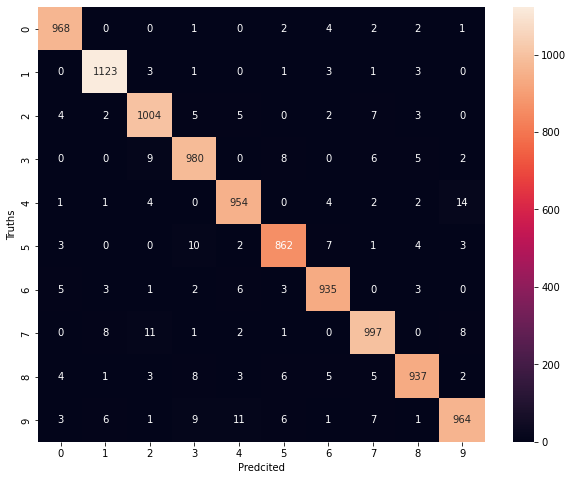

In [19]:
conf_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predcited')
plt.ylabel('Truths')

-------------End------------------